<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module3_All_Labs_AIML_-/blob/main/MODULE3_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 3 : CLASSIFICATION-1**

LAB-2 : IMPLEMENTING KNN FROM SCRATCH AND VISUALIZE ALGORITHM PERFORMANCE.

# **Section 1 : Implementing KNN**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train,y_train,X_test,k):
  distances=[]
  targets=[]
  for i in range(len(X_train)):
    distances.append([np.sqrt(np.sum(np.square(X_test-X_train[i,:]))),i])
  distances=sorted(distances)
  for i in range(k):
    index=distances[i][1]
    targets.append(y_train[index])
  return Counter(targets).most_common(1)[0][0]

In [3]:
def k_nearest_neighbor(X_train,y_train,X_test,k):
  assert k <= len(X_train)
  predictions=[]
  for i in range(len(X_test)):
    predictions.append(predict(X_train,y_train,X_test[i,:],k))
  return np.asarray(predictions)

In [4]:
def NN1(traindata,trainlabel,query):
  diff=traindata-query
  sq=np.square(diff)
  dist=np.sum(sq,axis=1)
  pos=np.argmin(dist)
  return trainlabel[pos]

In [5]:
def Accuracy(gtlabel,predlabel):
  assert len(gtlabel)==len(predlabel)
  correct=0
  for i in range(len(gtlabel)):
    if gtlabel[i]==predlabel[i]:
      correct+=1
  return correct/len(gtlabel)

# **Section 1.1 - Iris Dataset**

In [6]:
from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X=np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y=np.array(df['target'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
predictions=k_nearest_neighbor(X_train,y_train,X_test,3)
accuracy=Accuracy(y_test,predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 100.0 %


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
accuracy=Accuracy(y_test,predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 100.0 %


# **Section 1.2 : Weighted NN**

In [14]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = np.array(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3
k_nearest_neighbors = k_nearest_neighbor(X_train, y_train, X_test, k)
print("K-nearest neighbors with distances:")
print(k_nearest_neighbors)


K-nearest neighbors with distances:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# **Section 2 : Visualizing Data**

In [10]:
from types import new_class
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

def voronoi_finite_polygons_2d(vor, radius=None):
  if vor.points.shape[1] != 2:
    raise ValueError("Requires 2D input")
  new_regions = []
  # Convert new_vertices to a list initially
  new_vertices = np.vstack([vor.vertices, vor.points]).tolist()
  center = vor.points.mean(axis=0)
  if radius is None:
    radius = vor.points.ptp().max()

  all_ridges = {}
  for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
    all_ridges.setdefault(p1, []).append((p2, v1, v2))
    all_ridges.setdefault(p2, []).append((p1, v1, v2))

  for p1, region in enumerate(vor.point_region):
    vertices = vor.regions[region]
    if all(v >= 0 for v in vertices):
      new_regions.append(vertices)
      continue

    ridges = all_ridges[p1]
    new_region = [v for v in vertices if v >= 0]
    for p2, v1, v2 in ridges:
      if v2 < 0:
        v1, v2 = v2, v1
      if v1 >= 0:
        continue

      t = vor.points[p2] - vor.points[p1]
      t /= np.linalg.norm(t)
      n = np.array([-t[1], t[0]])
      midpoint = vor.points[[p1, p2]].mean(axis=0)
      direction = np.sign(np.dot(midpoint - center, n)) * n
      far_point = vor.vertices[v2] + direction * radius
      new_region.append(len(new_vertices))
      new_vertices.append(far_point.tolist())

    vs = np.array([new_vertices[v] for v in new_region])
    c = vs.mean(axis=0)
    angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0]) #Fixed to calculate angles
    new_region = np.array(new_region)[np.argsort(angles)] #Fixed the order of vertices
    new_regions.append(new_region.tolist())

  return new_regions, np.asarray(new_vertices)

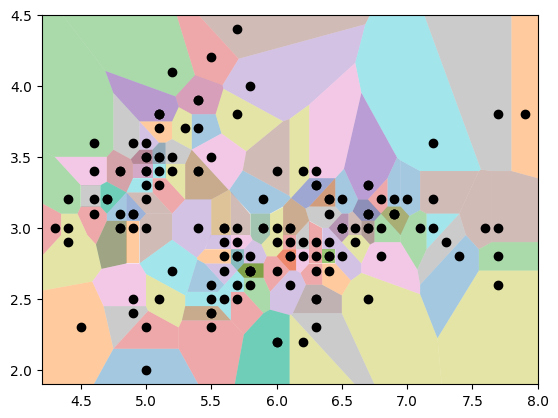

In [11]:
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
points = np.array(points)
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

# **Section 2.2 : Understanding Decision Boundaries**

In [17]:
from matplotlib.colors import ListedColormap
import seaborn as sns

def decision_boundary_plot(x_dec,y_dec,k):
  h=.05
  n=len(set(y_dec))
  cmap_light=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'][:n])
  cmap_bold=ListedColormap(['#FF0000','#00FF00','#0000FF'][:n])

  for weights in ['uniform','distance']:
    clf=KNeighborsClassifier(n_neighbors=k,weights=weights)
    clf.fit(x_dec,y_dec)

    x_min,x_max=x_dec[:,0].min()-1,x_dec[:,0].max()+1
    y_min,y_max=x_dec[:,1].min()-1,x_dec[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

    Z=Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    sns.scatterplot(x=x_dec[:,0],y=x_dec[:,1],hue=y_dec,palette=cmap_bold,alpha=1.0,edgecolor='black')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("Multi-Classification (k=%i,weights='%s')"%(k,weights))
    plt.show()

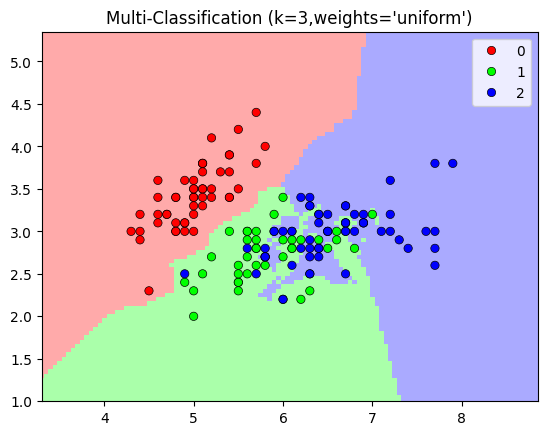

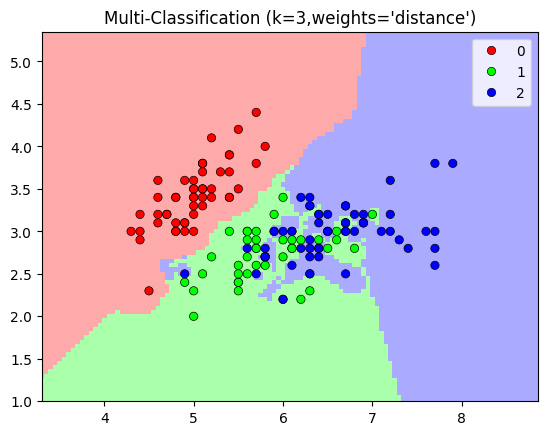

In [18]:
x_pts=X[:,:2]
y_pts=y
decision_boundary_plot(x_pts,y_pts,3)

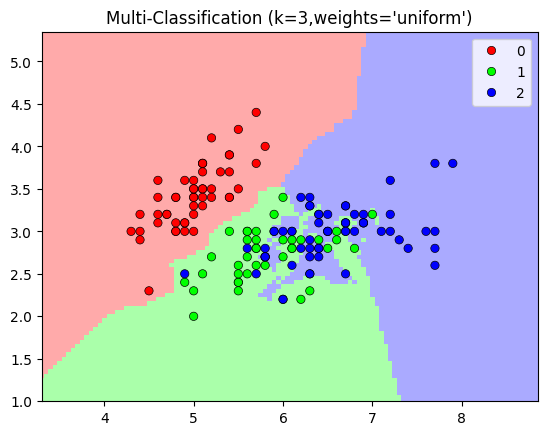

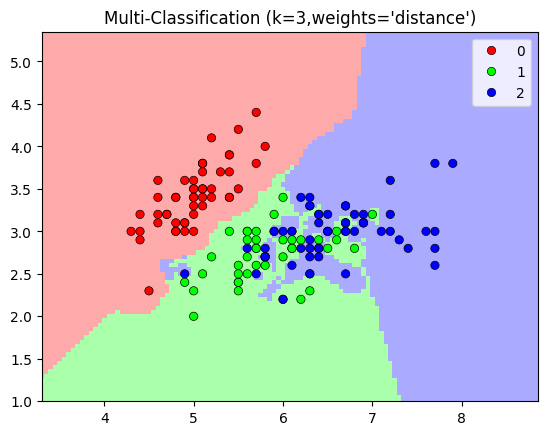

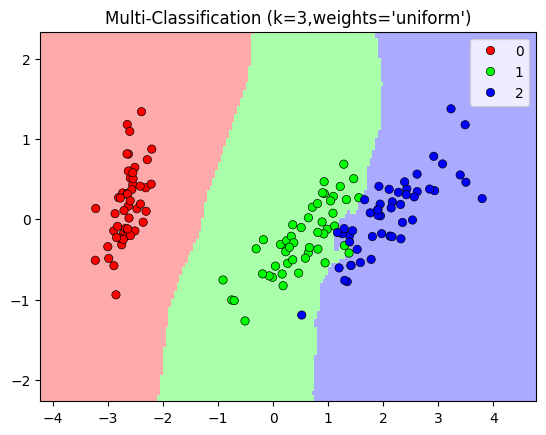

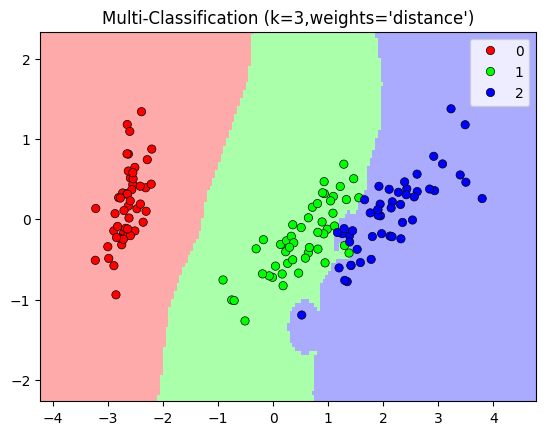

In [20]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = np.array(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK-1: Voronoi diagram and decision boundaries with two attributes
x_pts = X[:, :2]
y_pts = y
decision_boundary_plot(x_pts, y_pts, 3)

# TASK-2: Apply PCA to reduce the dataset to two dimensions and plot decision boundaries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

# ... (rest of your code) ...

# TASK-2: Apply PCA to reduce the dataset to two dimensions and plot decision boundaries
pca = PCA(n_components=2) # Now PCA should be recognized
X_pca = pca.fit_transform(X)

decision_boundary_plot(X_pca, y, 3)


# **Section 2.3 : Confusion Matrix**

In [22]:
from sklearn.metrics import confusion_matrix

pd.crosstab(y_test,predictions,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,9,0,9
2,0,0,11,11
All,10,9,11,30


Text(0.5, 23.52222222222222, 'Predicted Label')

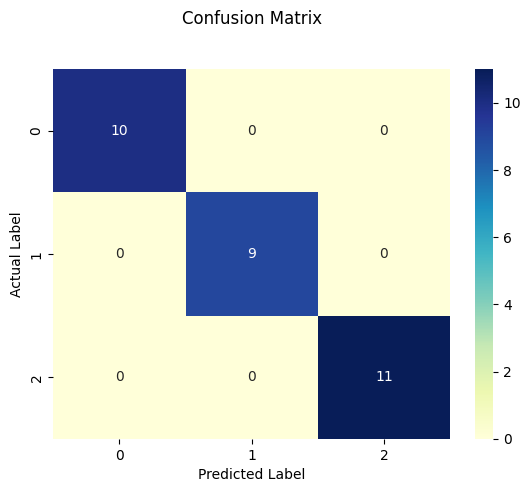

In [23]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,predictions)
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# **Section 2.4 : Classification Report**

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Car Evaluation Dataset

In [30]:
from google.colab import files
uploaded=files.upload()

Saving car_evaluation.csv to car_evaluation (2).csv


In [31]:
filename = list(uploaded.keys())[0]
car_df = pd.read_csv(io.BytesIO(uploaded[filename]))
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [32]:
for x in car_df.columns:
  le=preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [33]:
dataset=car_df.values
X=dataset[:,0:6]
y=np.array(dataset[:,6])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
accuracy=Accuracy(y_test,predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 84.97109826589595 %


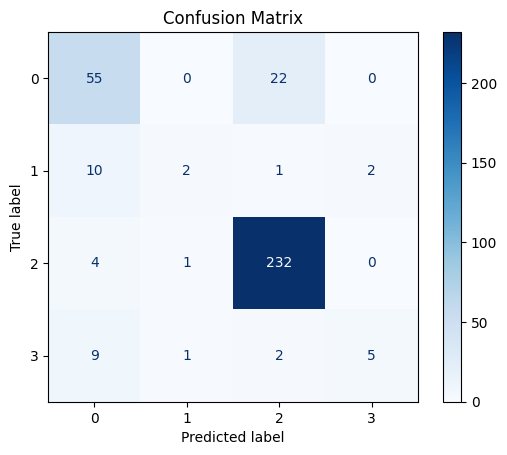

In [37]:
# TASK-3: Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [38]:
# TASK-4: Print Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        77
           1       0.50      0.13      0.21        15
           2       0.90      0.98      0.94       237
           3       0.71      0.29      0.42        17

    accuracy                           0.85       346
   macro avg       0.71      0.53      0.57       346
weighted avg       0.83      0.85      0.83       346



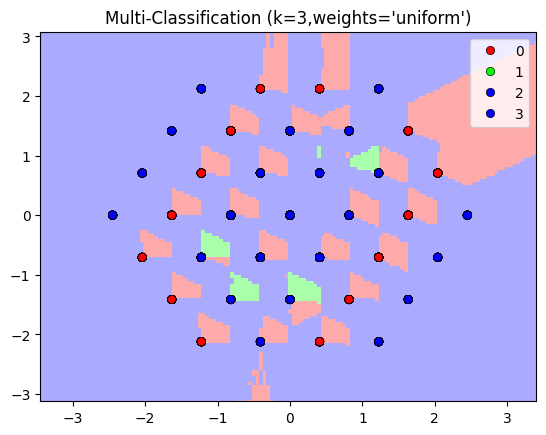

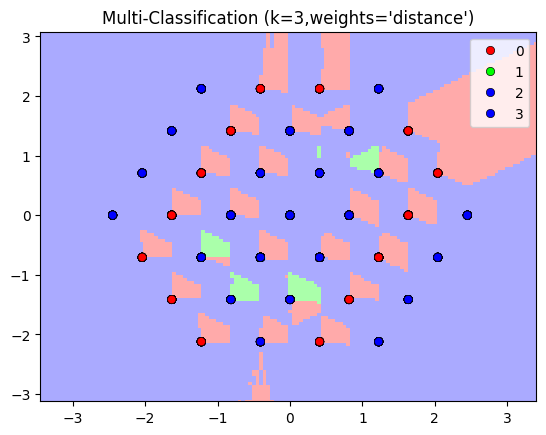

In [39]:
# TASK-5: Plot Decision Boundary for Car Evaluation Dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
decision_boundary_plot(X_pca, y, 3)

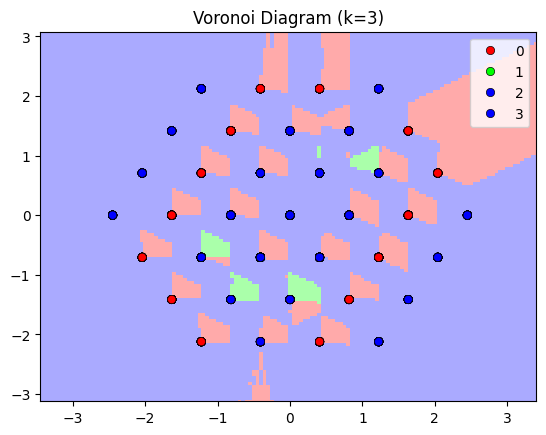

In [40]:
# TASK-6: Plot Voronoi Diagram for Car Evaluation Dataset
def plot_voronoi(X, y, k):
    h = .05
    n = len(set(y))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'][:n])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'][:n])

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, alpha=1.0, edgecolor='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Voronoi Diagram (k=%i)" % k)
    plt.show()
plot_voronoi(X_pca, y, 3)

# **Questions**

1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.

  'Uniform': All neighbors contribute equally to the prediction, regardless of their distance to the query point.

  'Distance': Neighbors closer to the query point have a higher influence on the prediction, as weights are inversely proportional to their distance.

2. What do you think could be the drawbacks of using KNN ?

Drawbacks of KNN:
  
  Computational Cost: KNN requires calculating the distance to all training samples for each prediction, which can be slow for large datasets.

 Curse of Dimensionality: Performance can degrade as the number of dimensions increases, making the distance metric less meaningful.
  
  Sensitivity to Noise: Outliers or noisy data can significantly affect predictions.

   Storage Requirements: KNN stores the entire dataset, requiring significant memory for large datasets.
  
   Choosing K: The optimal value of K is dataset-dependent and may require trial and error to determine.